#Preparing Data
##Binary Data and Binary Classification
###Binary targets on the Cleveland Heart Disease dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

--2020-09-02 22:32:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘processed.cleveland.data’

processed.cleveland 100%[===================>]  18.03K  --.-KB/s    in 0.06s   

2020-09-02 22:32:19 (282 KB/s) - ‘processed.cleveland.data’ saved [18461/18461]



In [ ]:
import pandas as pd
df = pd.read_csv('processed.cleveland.data', header=None)
print(df.head())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [ ]:
print(set(df[13]))
df[13].replace(to_replace=[2,3,4], value=1, inplace=True)
print(df.head())
print(set(df[13]))

{0, 1, 2, 3, 4}
     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   1
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
{0, 1}


###Binarizing the MNIST dataset

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


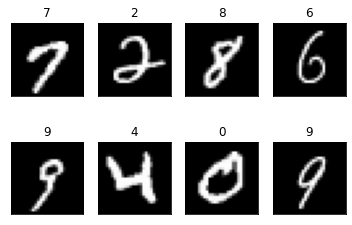

In [ ]:
import matplotlib.pyplot as plt
for i, (img, y) in enumerate(zip(mnist.data[15:23].reshape(8, 28, 28), mnist.target[15:23])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.3.mnist_samples.png', bbox_inches='tight', dpi=350)

In [ ]:

print(mnist.data[0].reshape(28, 28))


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

In [ ]:
print(mnist.data[0].reshape(28, 28)[10:18,10:18])

mnist.data[mnist.data < 128] = 0
mnist.data[mnist.data >=128] = 1

print(mnist.data[0].reshape(28, 28)[10:18,10:18])


[[  1. 154. 253.  90.   0.   0.   0.   0.]
 [  0. 139. 253. 190.   2.   0.   0.   0.]
 [  0.  11. 190. 253.  70.   0.   0.   0.]
 [  0.   0.  35. 241. 225. 160. 108.   1.]
 [  0.   0.   0.  81. 240. 253. 253. 119.]
 [  0.   0.   0.   0.  45. 186. 253. 253.]
 [  0.   0.   0.   0.   0.  16.  93. 252.]
 [  0.   0.   0.   0.   0.   0.   0. 249.]]
[[0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


####Binarizing the targets

In [ ]:
X = mnist.data[(mnist.target == '7') | (mnist.target == '8')]
y = mnist.target[(mnist.target == '7') | (mnist.target == '8')]
print(X.shape)
print(y.shape)

(14118, 784)
(14118,)


In [ ]:
print(y[:10])
y = [0 if v=='7' else 1 for v in y]
print(y[:10])

['7' '8' '7' '8' '7' '8' '7' '8' '7' '8']
[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


##Categorical Data and Multiple Classes

###Converting string labels to numbers

In [ ]:
# re-load the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print(set(mnist.target))
print(list(set(mnist.target)))
print(sorted(list(set(mnist.target))))

le.fit(sorted(list(set(mnist.target))))

{'3', '2', '4', '5', '0', '1', '6', '9', '8', '7'}
['3', '2', '4', '5', '0', '1', '6', '9', '8', '7']
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


LabelEncoder()

In [ ]:
print(list(le.classes_))

print(le.transform(["9", "3", "7"]) )

list(le.inverse_transform([2, 2, 1]))


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[9 3 7]


['2', '2', '1']

In [ ]:
print("Before ", mnist.target[:3])
y = le.transform(mnist.target)
print("After ", y[:3])

Before  ['5' '0' '4']
After  [5 0 4]


###Converting categories to one hot encoding

In [ ]:
import pandas as pd
df = pd.DataFrame({'Gender': ['female', 'male', 'male', 'female', 'female']})
print(df)

   Gender
0  female
1    male
2    male
3  female
4  female


In [ ]:
pd.get_dummies(df, prefix=['Gender'])

,Gender_female,Gender_male
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = [list(v) for v in mnist.target]
enc.fit(y)

print('Before: ', y[0])
y = enc.transform(y).toarray()
print('After: ', y[0])
print(enc.get_feature_names())

Before:  ['5']
After:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
['x0_0' 'x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x0_6' 'x0_7' 'x0_8' 'x0_9']


##Real-Valued Data and Univariate Regression

###Scaling to specific values

In [ ]:
df = pd.read_csv('processed.cleveland.data', header=None)
df[[4,9]].describe()

,4,9
count,303.000000,303.000000
mean,246.693069,1.039604
std,51.776918,1.161075
min,126.000000,0.000000
25%,211.000000,0.000000
50%,241.000000,0.800000
75%,275.000000,1.600000
max,564.000000,6.200000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[[4,9]])
df[[4,9]] = scaler.transform(df[[4,9]])
df[[4,9]].describe()

,4,9
count,303.000000,303.000000
mean,0.275555,0.167678
std,0.118212,0.187270
min,0.000000,0.000000
25%,0.194064,0.000000
50%,0.262557,0.129032
75%,0.340183,0.258065
max,1.000000,1.000000


###Standardizing to zero mean and unit variance

In [ ]:
df[[4,9]] = (df[[4,9]]-df[[4,9]].mean())/df[[4,9]].std()
df[[4,9]].describe()

,4,9
count,3.030000e+02,3.030000e+02
mean,2.572200e-16,-3.722728e-16
std,1.000000e+00,1.000000e+00
min,-2.331021e+00,-8.953805e-01
25%,-6.893626e-01,-8.953805e-01
50%,-1.099538e-01,-2.063639e-01
75%,5.467095e-01,4.826527e-01
max,6.128347e+00,4.444498e+00


In [ ]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('processed.cleveland.data', header=None)
scaler = StandardScaler()
scaler.fit(df[[4,9]])
df[[4,9]] = scaler.transform(df[[4,9]])
df[[4,9]].describe()

,4,9
count,3.030000e+02,3.030000e+02
mean,2.418308e-16,-1.700144e-16
std,1.001654e+00,1.001654e+00
min,-2.334877e+00,-8.968617e-01
25%,-6.905030e-01,-8.968617e-01
50%,-1.101357e-01,-2.067053e-01
75%,5.476139e-01,4.834512e-01
max,6.138485e+00,4.451851e+00


##Altering the Distribution of Data


In [ ]:
from sklearn.preprocessing import QuantileTransformer
df = pd.read_csv('processed.cleveland.data', header=None)
transformer = QuantileTransformer(output_distribution='normal')
df[[4,9]] = transformer.fit_transform(df[[4,9]])
df[[4,9]].describe()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (303). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


,4,9
count,3.030000e+02,303.000000
mean,-3.846198e-07,-1.327762
std,1.069179e+00,2.770411
min,-5.199338e+00,-5.199338
25%,-6.849468e-01,-5.199338
50%,0.000000e+00,0.045666
75%,6.744898e-01,0.638453
max,5.199338e+00,5.199338


In [ ]:
from sklearn.preprocessing import QuantileTransformer
df = pd.read_csv('processed.cleveland.data', header=None)
transformer = QuantileTransformer(output_distribution='uniform')
df[[4,9]] = transformer.fit_transform(df[[4,9]])
df[[4,9]].describe()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (303). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


,4,9
count,303.000000,303.000000
mean,0.500000,0.447069
std,0.290086,0.350610
min,0.000000,0.000000
25%,0.246689,0.000000
50%,0.500000,0.518212
75%,0.750000,0.738411
max,1.000000,1.000000


Supporting plots

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (303). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (303). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


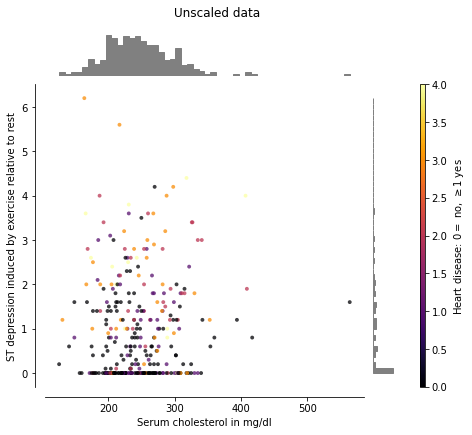

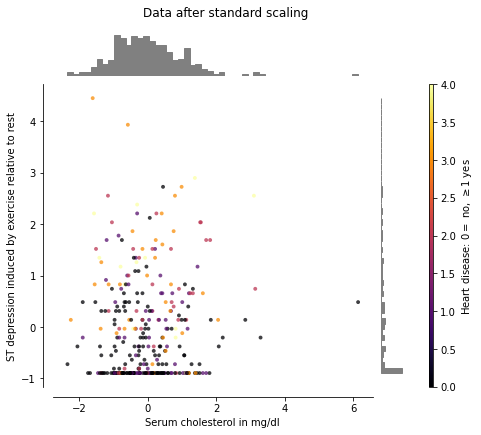

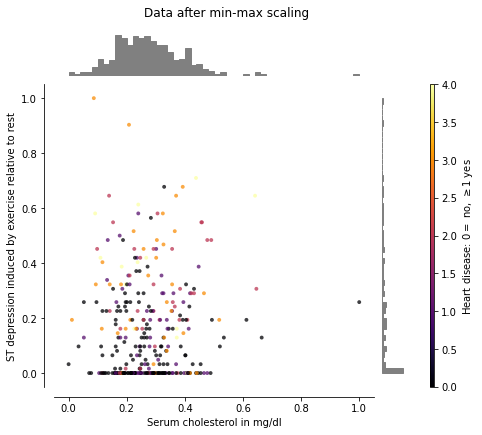

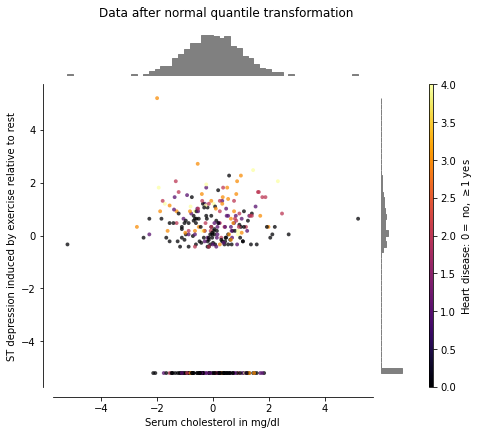

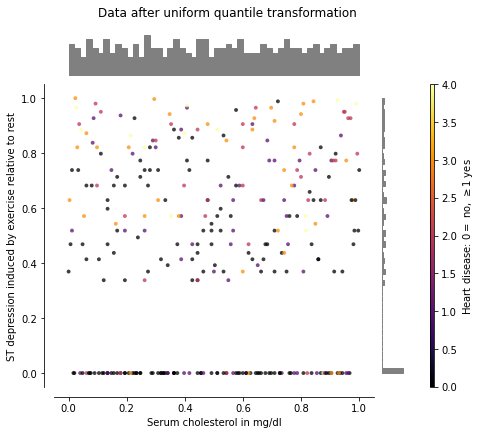

In [ ]:
# Inspired by this post: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
# Modified by: Pablo Rivas

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

df = pd.read_csv('processed.cleveland.data', header=None)
X = df[[4,9]].values
y_full = df[13].values

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after normal quantile transformation',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after uniform quantile transformation',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X))
]

y = minmax_scale(y_full)

cmap = getattr(cm, 'inferno', cm.hot_r)

def create_axes(title, figsize=(6, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.74
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.12
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)


    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.75, marker='o', s=15, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')
    
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_colorbar = create_axes(title)
    plot_distribution(ax_zoom_out, X, y, hist_nbins=50,
                      x0_label="Serum cholesterol in mg/dl",
                      x1_label="ST depression induced by exercise relative to rest")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Heart disease: $0=$ no, $\geq 1$ yes')
    plt.savefig('ch.3.normalization.'+str(item_idx)+'.png', bbox_inches='tight', dpi=350)
    
make_plot(0)
make_plot(1)
make_plot(2)
make_plot(3)
make_plot(4)

##Data Augmentation

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


###Rescaling

In [ ]:
from skimage.transform import rescale
x = mnist.data[0].reshape(28,28)
y = mnist.target[0]

s = rescale(x, 1.0 / 2.0, multichannel=False)
x_= rescale(s, 2.0, multichannel=False)

mnist.data[1] = x_.flatten()
mnist.target[1] = y

### Adding Noise

In [ ]:
from skimage.util import random_noise

x_ = random_noise(x)
mnist.data[2] = x_.flatten()
mnist.target[2] = y

### Rotating

In [ ]:
from skimage.transform import rotate

x_ = rotate(x, 22)
mnist.data[3] = x_.flatten()
mnist.target[3] = y

In [ ]:
x = mnist.data[4].reshape(28,28)
y = mnist.target[4]

s = rescale(x, 1.0 / 2.0, multichannel=False)
x_= rescale(s, 2.0, multichannel=False)

mnist.data[5] = x_.flatten()
mnist.target[5] = y

x_ = random_noise(x)
mnist.data[6] = x_.flatten()
mnist.target[6] = y

x_ = rotate(x, -22)
mnist.data[7] = x_.flatten()
mnist.target[7] = y

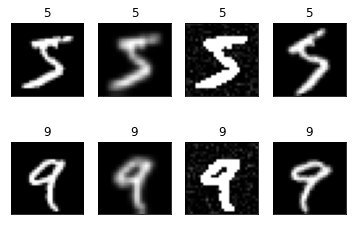

In [ ]:
import matplotlib.pyplot as plt
for i, (img, y) in enumerate(zip(mnist.data[0:8].reshape(8, 28, 28), mnist.target[0:8])):
  plt.subplot(241 + i)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.3.mnist_augmented.png', bbox_inches='tight', dpi=350)

##Data Dimensionality Reduction
###Supervised algorithms
####Linear discriminant analysis


(297, 2)


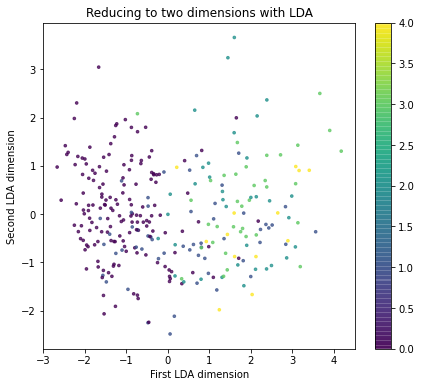

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df = pd.read_csv('processed.cleveland.data', header=None)
df = df.apply(pd.to_numeric, errors='coerce').dropna()

X = df[[0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y = df[13].values

dr = LinearDiscriminantAnalysis(n_components=2)
X_ = dr.fit_transform(X, y)

print(X_.shape)

plt.figure(figsize=(7,6))
plt.title('Reducing to two dimensions with LDA')
plt.scatter(X_[:,0], X_[:,1], s=7, c=y, alpha=0.75)
plt.xlabel('First LDA dimension')
plt.ylabel('Second LDA dimension')
plt.colorbar()
plt.savefig('ch.3.LDA.png', bbox_inches='tight', dpi=350)

###Unsupervised techniques
####Kernel PCA

(297, 2)


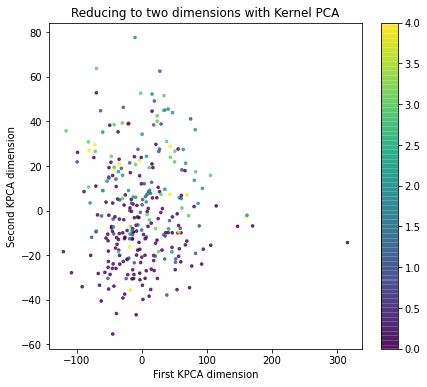

In [ ]:
from sklearn.decomposition import KernelPCA

dr = KernelPCA(n_components=2, kernel='linear')
X_ = dr.fit_transform(X)

print(X_.shape)

plt.figure(figsize=(7,6))
plt.title('Reducing to two dimensions with Kernel PCA')
plt.scatter(X_[:,0], X_[:,1], s=7, c=y, alpha=0.75)
plt.xlabel('First KPCA dimension')
plt.ylabel('Second KPCA dimension')
plt.colorbar()
plt.savefig('ch.3.KPCA.png', bbox_inches='tight', dpi=350)

####Large datasets
#####Sparse PCA

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_sparse_pca.py:23: FutureWarning: 'normalize_components' has been deprecated in 0.22 and will be removed in 0.24. Remove the parameter from the  constructor.
  " constructor.", FutureWarning


Iteration   0 (elapsed time:   2s,  0.0mn)
.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

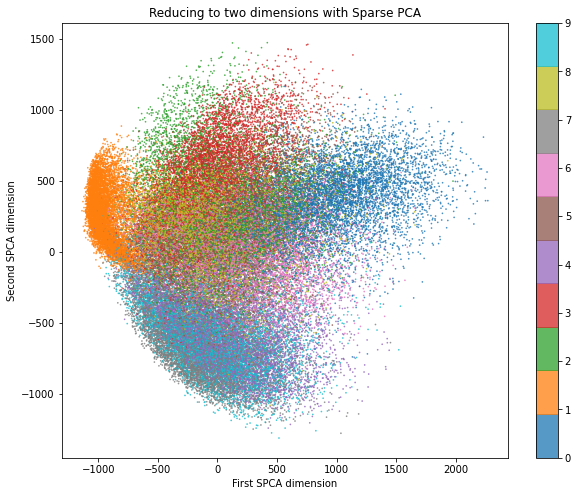

In [ ]:
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
mnist = fetch_openml('mnist_784')

X = mnist.data
y = list(map(int, mnist.target))

dr = MiniBatchSparsePCA(n_components=2, batch_size=50, 
                        normalize_components=True, verbose=2)
X_ = dr.fit_transform(X)

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Reducing to two dimensions with Sparse PCA')
plt.scatter(X_[:,0], X_[:,1], s=0.5, c=y, alpha=0.75, cmap='tab10')
plt.xlabel('First SPCA dimension')
plt.ylabel('Second SPCA dimension')
plt.colorbar()
plt.savefig('ch.3.SPCA.png', bbox_inches='tight', dpi=350)

#####Dictionary Learning

[dict_learning] ........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

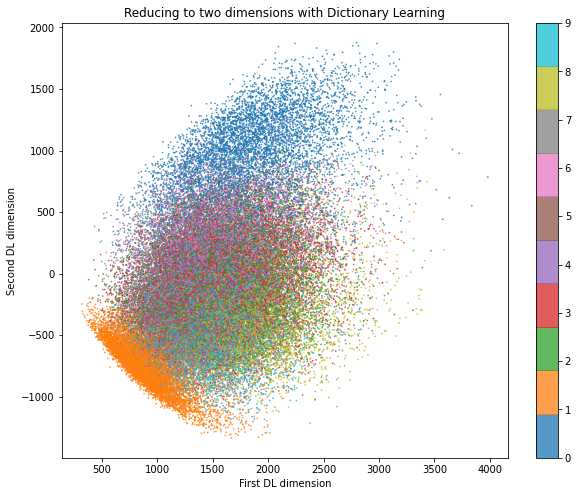

In [ ]:
from sklearn.decomposition import MiniBatchDictionaryLearning

X = mnist.data
y = list(map(int, mnist.target))

dr = MiniBatchDictionaryLearning(n_components=2, batch_size=50, 
                                 verbose=True)
X_ = dr.fit_transform(X)

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('Reducing to two dimensions with Dictionary Learning')
plt.scatter(X_[:,0], X_[:,1], s=0.5, c=y, alpha=0.75, cmap='tab10')
plt.xlabel('First DL dimension')
plt.ylabel('Second DL dimension')
plt.colorbar()
plt.savefig('ch.3.DL.png', bbox_inches='tight', dpi=350)